_Lambda School Data Science_

# Make features

Objectives
-  understand the purpose of feature engineering
-  work with strings in pandas
- work with dates and times in pandas

Links
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series

## Get LendingClub data

[Source](https://www.lendingclub.com/info/download-data.action)

In [1]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-05-03 01:13:35--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [                <=> ]  21.40M   882KB/s    in 25s     

2019-05-03 01:14:00 (870 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22444881]



In [2]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [3]:
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

## Load LendingClub data

pandas documentation
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [`options.display`](https://pandas.pydata.org/pandas-docs/stable/options.html#available-options)

In [4]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer='LoanStats_2018Q4.csv',sep=',')
#Can also, write pf = pd.read_csv(LoanStats_2018Q4.csv)
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,123,124,125,126,127,128,129,130,131,132,133,134,135,136,138,139,140,141,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title      emp_length home_ownership annual_inc verification_status issue_d  loan_status pymnt_plan url desc purpose            title              zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       10000     10000       10000            36 months  10.33%  324.23      B     B1        NaN            < 1 year   MORTGAGE       280000     Not Verified        Dec-2018 Current     n          NaN NaN  debt_consolidation Debt consolidation 974xx    OR         6.15  2           Jan-1996         0              18                     NaN                    14       0       9082      38%        23        w                   9035.04   9035.04       1288.31     1288.31         964.96          323.35        0.0                0.0        0.0                     Apr-2019     324.23          May-2019     Apr-2019           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              671          246828      1           3           2           3           1                  48552        62      1           3           4923       46       23900            2      7           1            7                    17631       11897          43.1    0                        0           158                275                  11                    1              1        11                   NaN                      11                    NaN                            0                     3              4               7           7         10        9             11            4                   14       0                0            0                  4                  91.3           28.6             0                    0

In [5]:
df = pd.read_csv(filepath_or_buffer='LoanStats_2018Q4.csv',sep=',',skiprows=1)
df.tail()
#Oh, but last rows are off. Compare result with "!tail df". So we see end of file has extra statments.

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,123,124,125,128,129,130,133,138,139,140) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128409,NaN,NaN,5000.0,5000.0,5000.0,36 months,13.56%,169.83,C,C1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128410,NaN,NaN,10000.0,10000.0,9750.0,36 months,11.06%,327.68,B,B3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128411,NaN,NaN,10000.0,10000.0,10000.0,36 months,16.91%,356.08,C,C5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128412,Total amount funded in policy code 1: 2050909275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128413,Total amount funded in policy code 2: 820109297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = pd.read_csv(filepath_or_buffer='LoanStats_2018Q4.csv',sep=',',skiprows=1,skipfooter=2)
df.tail()
#Now it's clean


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128407,NaN,NaN,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128408,NaN,NaN,10000,10000,10000.0,36 months,15.02%,346.76,C,C3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128409,NaN,NaN,5000,5000,5000.0,36 months,13.56%,169.83,C,C1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128410,NaN,NaN,10000,10000,9750.0,36 months,11.06%,327.68,B,B3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128411,NaN,NaN,10000,10000,10000.0,36 months,16.91%,356.08,C,C5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(128412, 144)

In [8]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,desc,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,128412.000000,128412.000000,128412.000000,128412.000000,1.284120e+05,0.0,0.0,128175.000000,...,1.0,1.00,1.0,1.0,1.00,1.00,1.00,7.000000,7.000000,7.0
mean,NaN,NaN,15971.321021,15971.321021,15968.498166,463.259353,8.279733e+04,NaN,NaN,19.933178,...,3.0,378.39,3.0,22.0,1135.17,15351.85,1045.41,4373.588571,61.448571,14.0
std,NaN,NaN,10150.384233,10150.384233,10152.168970,285.718256,1.082985e+05,NaN,NaN,20.143542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2985.404770,7.486945,4.0
min,NaN,NaN,1000.000000,1000.000000,725.000000,30.480000,0.000000e+00,NaN,NaN,0.000000,...,3.0,378.39,3.0,22.0,1135.17,15351.85,1045.41,699.120000,45.010000,8.0
25%,NaN,NaN,8000.000000,8000.000000,8000.000000,253.630000,4.705800e+04,NaN,NaN,11.760000,...,3.0,378.39,3.0,22.0,1135.17,15351.85,1045.41,2739.500000,62.500000,12.0
50%,NaN,NaN,14000.000000,14000.000000,14000.000000,382.905000,6.800000e+04,NaN,NaN,17.990000,...,3.0,378.39,3.0,22.0,1135.17,15351.85,1045.41,3980.000000,65.000000,12.0
75%,NaN,NaN,21600.000000,21600.000000,21600.000000,622.680000,9.900000e+04,NaN,NaN,25.300000,...,3.0,378.39,3.0,22.0,1135.17,15351.85,1045.41,5169.000000,65.005000,18.0
max,NaN,NaN,40000.000000,40000.000000,40000.000000,1618.240000,9.757200e+06,NaN,NaN,999.000000,...,3.0,378.39,3.0,22.0,1135.17,15351.85,1045.41,10119.000000,65.120000,18.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128412 entries, 0 to 128411
Columns: 144 entries, id to settlement_term
dtypes: float64(57), int64(51), object(36)
memory usage: 141.1+ MB


In [10]:
#Average number of NaN's per row
df.isnull().sum(axis=1).mean()

40.74805314145095

In [11]:
#Find which features are NaNs and at what frequency
#axis=0 means look at it across rows for each column
#axis=1 means look at it across columns for each row
df.isnull().sum(axis=0).sort_values(ascending=False)/len(df)

id                                            1.000000
member_id                                     1.000000
url                                           1.000000
desc                                          1.000000
hardship_dpd                                  0.999992
deferral_term                                 0.999992
hardship_amount                               0.999992
hardship_start_date                           0.999992
hardship_end_date                             0.999992
payment_plan_start_date                       0.999992
hardship_length                               0.999992
orig_projected_additional_accrued_interest    0.999992
hardship_loan_status                          0.999992
hardship_reason                               0.999992
hardship_payoff_balance_amount                0.999992
hardship_last_payment_amount                  0.999992
hardship_type                                 0.999992
hardship_status                               0.999992
settlement

## Work with strings

For machine learning, we usually want to replace strings with numbers.

We can get info about which columns have a datatype of "object" (strings)

In [12]:
df.dtypes.value_counts()

float64    57
int64      51
object     36
dtype: int64

In [13]:
#The feature below is considered a string
df['int_rate'].head()

0     10.33%
1     23.40%
2     17.97%
3     12.98%
4     13.56%
Name: int_rate, dtype: object

In [14]:
'abcd'.strip('d')
#'abcd'[:-1]

'abc'

### Convert `int_rate`

Define a function to remove percent signs from strings and convert to floats

In [0]:
def strip_percent(x_str):
  return float(x_str.strip('%'))  #or do x_str[-1])

In [0]:
#notice dtype at bottom changd to float and we removed %
df['int_rate'] = df['int_rate'].apply(strip_percent)
               

In [17]:
df['int_rate'].head()

0    10.33
1    23.40
2    17.97
3    12.98
4    13.56
Name: int_rate, dtype: float64

In [18]:
#Notice it became a float
df['int_rate'].dtypes

dtype('float64')

In [19]:
#now let's add the % back in
df['int_rate'] = df['int_rate'].apply(lambda x: str(x) + '%')
df['int_rate'].head()

0    10.33%
1     23.4%
2    17.97%
3    12.98%
4    13.56%
Name: int_rate, dtype: object

In [24]:
df['int_rate'].apply(strip_percent).head() #doesn't actually change int_rate

0    10.33
1    23.40
2    17.97
3    12.98
4    13.56
Name: int_rate, dtype: float64

In [25]:
df['int_rate'].apply(lambda x_str: float(x_str.strip('%'))).head() #another way to do it

0    10.33
1    23.40
2    17.97
3    12.98
4    13.56
Name: int_rate, dtype: float64

In [0]:
strip_percent_v2 = lambda x_str: float(x_str.strip('%')) 
#bad way to store the function 'strip_percent_v2', because it looks like a variable

In [28]:
df['int_rate'].apply(strip_percent_v2).head()

0    10.33
1    23.40
2    17.97
3    12.98
4    13.56
Name: int_rate, dtype: float64

Apply the function to the `int_rate` column

In [29]:
'10.33%'[:-1]

'10.33'

In [0]:
def strip_percent(x_str):
  return float(x_str.strip('%')) # x_str[-1]

In [31]:
df['int_rate'] = df['int_rate'].apply(strip_percent)
df['int_rate'].head()

0    10.33
1    23.40
2    17.97
3    12.98
4    13.56
Name: int_rate, dtype: float64

### Clean `emp_title`

Look at top 20 titles

In [32]:
df['emp_title'].head(n=10)

0                   NaN
1              Security
2        Administrative
3                   NaN
4                  Chef
5           Postmaster 
6              Operator
7    Nursing Supervisor
8               Manager
9      Material Handler
Name: emp_title, dtype: object

How often is `emp_title` null?

In [33]:
df['emp_title'].value_counts(dropna=False).head(20)
#Notice Registered Nurse and RN are both listed, and you should really be analyzing them together
# which you should fix later. But that's a topic for another day...


NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Truck Driver            387
Operations Manager      387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [34]:
df['emp_title'].isnull().sum()

20947

In [35]:
import numpy as np
type(np.NaN) #NaN is a float

float



Clean the title and handle missing values

In [40]:
def clean_title(title):
   if isinstance(title,str): #returns true if title is a string type
      return title.strip().lower()
   else:
      return 'unknown'   #print unknown if NaN value

clean_title(np.NaN) #as an example

'unknown'

In [41]:
df['emp_title'] = df['emp_title'].apply(clean_title)
df['emp_title'].head()

0           unknown
1          security
2    administrative
3           unknown
4              chef
Name: emp_title, dtype: object

In [42]:
import numpy as np
type(np.NaN)

float

In [43]:
def clean_title(title):
  if isinstance(title,str):
    return title.strip().lower()
  else:
    return 'unknown'

clean_title('Operations Manager ') #as example

'operations manager'

In [44]:
#Turn everything into lower case
df['emp_title'] = df['emp_title'].apply(clean_title)
df['emp_title'].value_counts(dropna=False).head(20)

unknown               20947
teacher                2557
manager                2395
registered nurse       1418
driver                 1258
supervisor             1160
truck driver            920
rn                      834
office manager          805
sales                   803
general manager         791
project manager         720
owner                   625
director                523
operations manager      518
sales manager           500
police officer          440
nurse                   425
technician              420
engineer                412
Name: emp_title, dtype: int64

### Create `emp_title_manager`

pandas documentation: [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)

In [45]:
df['emp_title'].str.contains('manager').head()

0    False
1    False
2    False
3    False
4    False
Name: emp_title, dtype: bool

In [46]:
#Create new feature 'emp_title_manager'
df['emp_title_manager'] = df['emp_title'].str.contains('manager')  #Boolean if string contains 'manager'
df['emp_title_manager'].sample(10)   
                                                     

14779     False
115048    False
40507     False
123090    False
92968     False
119842    False
45833      True
83903      True
115674    False
115897    False
Name: emp_title_manager, dtype: bool

In [47]:
df['emp_title'].nunique()
#As you see below, so many unique employment data types, so it's not a good idea to employ one-hot encoding

34902

In [70]:
df.to_csv('tmp.csv',index=False)  #Don't need to include an index column
df_2 = pd.read_csv('tmp.csv')
df_2.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (123,124,125,128,129,130,133,138,139,140) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,36 months,10.33%,324.23,B,B1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,4000,4000,4000.0,36 months,23.40%,155.68,E,E1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,9600,9600,9600.0,36 months,12.98%,323.37,B,B5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,2500,2500,2500.0,36 months,13.56%,84.92,C,C1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
idx_manager = df['emp_title_manager'] == True
df_managers = df[idx_manager]

In [50]:
df_managers.shape
#So number of rows tells us number of times 'manager' is listed in the manager title

(17885, 145)

In [51]:
idx_nonmanager = df['emp_title_manager'] == False
df_nonmanagers = df[idx_nonmanager]
df_nonmanagers.shape
#where 'manager' doesn't show up 

(110527, 145)

In [52]:
#Compare the interest rate of managers and nonmanagers
print(df_managers['int_rate'].mean(), df_nonmanagers['int_rate'].mean())

12.76060162146994 12.957682014350915


In [53]:
print(df_managers['int_rate'].std(), df_nonmanagers['int_rate'].std())

5.070847083428044 5.092995080869786


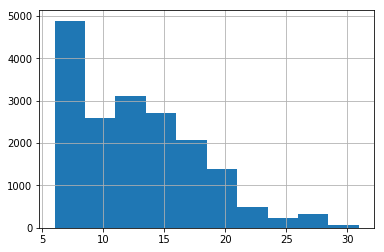

In [54]:
df_managers['int_rate'].hist()

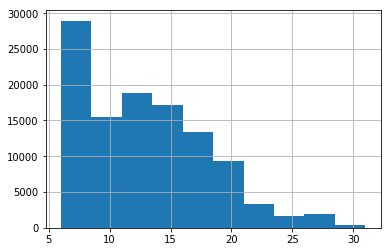

In [55]:
df_nonmanagers['int_rate'].hist()

## Work with dates

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

In [115]:
#First find a column with date values
df_nonmanagers.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'emp_title_manager',
       'issue_year', 'issue_month'],
      dtype='object', length=147)

In [57]:
for col_name in df_nonmanagers.columns:
  if col_name.endswith("_d"):
    print(col_name)

issue_d
last_pymnt_d
next_pymnt_d
last_credit_pull_d


In [58]:
df_nonmanagers['issue_d'].head()

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
Name: issue_d, dtype: object

In [0]:
del df #need this other next code block will throw an error about editing a copy of a dataframe

In [60]:
#Method to convert date and reasses dataframe
df_nonmanagers['issue_d'] = pd.to_datetime(df_nonmanagers['issue_d'])
df_nonmanagers['issue_d'].head()

0   2018-12-01
1   2018-12-01
2   2018-12-01
3   2018-12-01
4   2018-12-01
Name: issue_d, dtype: datetime64[ns]

In [61]:
df_nonmanagers['issue_year'] = df_nonmanagers['issue_d'].dt.year
df_nonmanagers['issue_month'] = df_nonmanagers['issue_d'].dt.month
df_nonmanagers[['issue_year','issue_month']].head()

,issue_year,issue_month
0,2018,12
1,2018,12
2,2018,12
3,2018,12
4,2018,12


# ASSIGNMENT

- Replicate the lesson code.

- Convert the `term` column from string to integer.

- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [64]:
df = pd.read_csv(filepath_or_buffer='LoanStats_2018Q4.csv',sep=',',skiprows=1,skipfooter=2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [99]:
df['term'].head()
df['term'].value_counts()

36    88179
60    40233
Name: term, dtype: int64

In [69]:
#check if there are any NaN values
df['term'].isnull().sum()

0

In [0]:
# function to remove 'months' string
def strip_months(x_str):
  return int(x_str.strip(' months'))

In [0]:
df['term'] = df['term'].apply(strip_months)
#or can do: df['term'].apply(lambda x_str: int(x_str.strip(' months'))).head()

In [81]:
df['term'].head()

0    36
1    36
2    36
3    36
4    36
Name: term, dtype: int64

In [88]:
df['loan_status'].value_counts()

Current               119540
Fully Paid              6367
Late (31-120 days)      1168
In Grace Period          666
Late (16-30 days)        350
Charged Off              319
Default                    2
Name: loan_status, dtype: int64

In [113]:
df['loan_status_is_great'] = ((df['loan_status'] == 'Current') | (df['loan_status'] == 'Fully Paid')).astype(int)
#for some reason, the above line doesn't typecast if I wrap the logical statement around int(), hmm....
df['loan_status_is_great'].value_counts()

1    125907
0      2505
Name: loan_status_is_great, dtype: int64

In [124]:
df['last_pymnt_d'].head()

0    Apr-2019
1    Apr-2019
2    Apr-2019
3    Apr-2019
4    Apr-2019
Name: last_pymnt_d, dtype: object

In [147]:
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'])
df['last_pymnt_d'].head()                                        

0   2019-04-01
1   2019-04-01
2   2019-04-01
3   2019-04-01
4   2019-04-01
Name: last_pymnt_d, dtype: datetime64[ns]

In [150]:
#df['issue_year'] = df['issue_d'].dt.year

df['last_pymnt_d_month'] = df['last_pymnt_d'].dt.month
df['last_pymnt_d_year'] = pd.to_datetime(df['last_pymnt_d']).dt.year
df[['last_pymnt_d_year','last_pymnt_d_month']].head()     

,last_pymnt_d_year,last_pymnt_d_month
0,2019.0,4.0
1,2019.0,4.0
2,2019.0,4.0
3,2019.0,4.0
4,2019.0,4.0


# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01